# Run Exercise 1.1 with nearest neighbor algorithm with FLANN to determine speedup and accuracy differences

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from pyflann import *

from utils import read_data

### Grab data

In [2]:
train_images = read_data.get_mnist_data(read_data.MNIST_TRAIN_IMAGES_URL).astype('int32')
train_labels = read_data.get_mnist_data(read_data.MNIST_TRAIN_LABELS_URL)
test_images = read_data.get_mnist_data(read_data.MNIST_TEST_IMAGES_URL).astype('int32')
test_labels = read_data.get_mnist_data(read_data.MNIST_TEST_LABELS_URL)

### Pull random sample from test and display label

9


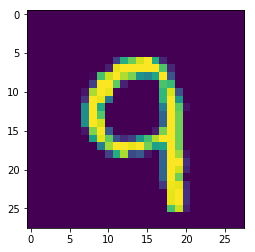

In [3]:
sample_test = np.random.randint(0,1000)
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Shuffle all rows

In [4]:
seed = np.random.randint(100)
# Get a random seed, but shuffle all matrices the same way
for i in range(test_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(test_images[i])
for i in range(train_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(train_images[i])

9


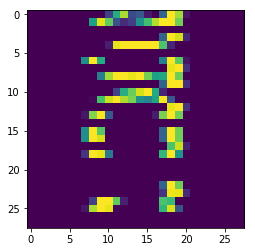

In [5]:
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Sampling
pyflann is so must faster, running the entire dataset completes in a reasonable amount of time

In [6]:
#test_samples = 1000 #Size of test data
#test_labels = test_labels[:test_samples]
#test_images = test_images[:test_samples,:]

### Flatten to 2d array for flann

In [7]:
test_images = test_images.reshape(test_images.shape[0],-1)
train_images = train_images.reshape(train_images.shape[0],-1)

### Run NN from pyflann

In [12]:
t0 = time.time()
errors = []
ks = [1, 5, 10, 20, 50, 100, 120]
for k in ks:
    flann = FLANN()
    result, dists = flann.nn(train_images, test_images, k) 
    if k > 1:
        top_result = result[:,0]
    else:
        top_result = result
    print(result.shape, top_result.shape)
    errors.append(1 - np.mean(np.equal(train_labels[top_result], test_labels)))
t1 =time.time()
# Improve this by also calculating the error of the training set like Fig1.21(a)

(10000,) (10000,)
(10000, 5) (10000,)
(10000, 10) (10000,)
(10000, 20) (10000,)
(10000, 50) (10000,)
(10000, 100) (10000,)
(10000, 120) (10000,)


In [9]:
print('error:' + str(errors))
print('Time taken:' + str(t1-t0))

error:[0.04959999999999998, 0.04830000000000001, 0.05069999999999997, 0.049799999999999955, 0.04290000000000005, 0.039000000000000035, 0.03859999999999997]
Time taken:3.22949481010437


### Plot errors

Text(0, 0.5, 'misclassification rate')

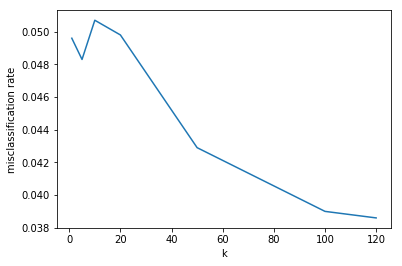

In [10]:
plt.figure()
plt.plot(ks, errors)
plt.xlabel('k')
plt.ylabel('misclassification rate')

### Appears that the misclassification rate decreases with increased K, versus Fig1.21(a) which decreases with increased k until k=120 where the misclassification rate goes back up